In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

En este caso vamos a intentar predecir en si un empleado se va a ir o no, en función de distintos parámetros

In [84]:
df = pd.read_csv("Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [12]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [13]:
df.isna().sum().sort_values(ascending = False)

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [14]:
df.duplicated().sum()

1889

In [17]:
df.drop_duplicates(inplace = True) #No hay que olvidarse del inplace = True para que se guarde en el df original

In [18]:
df.duplicated().sum()

0

# Visualización de los datos

In [5]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

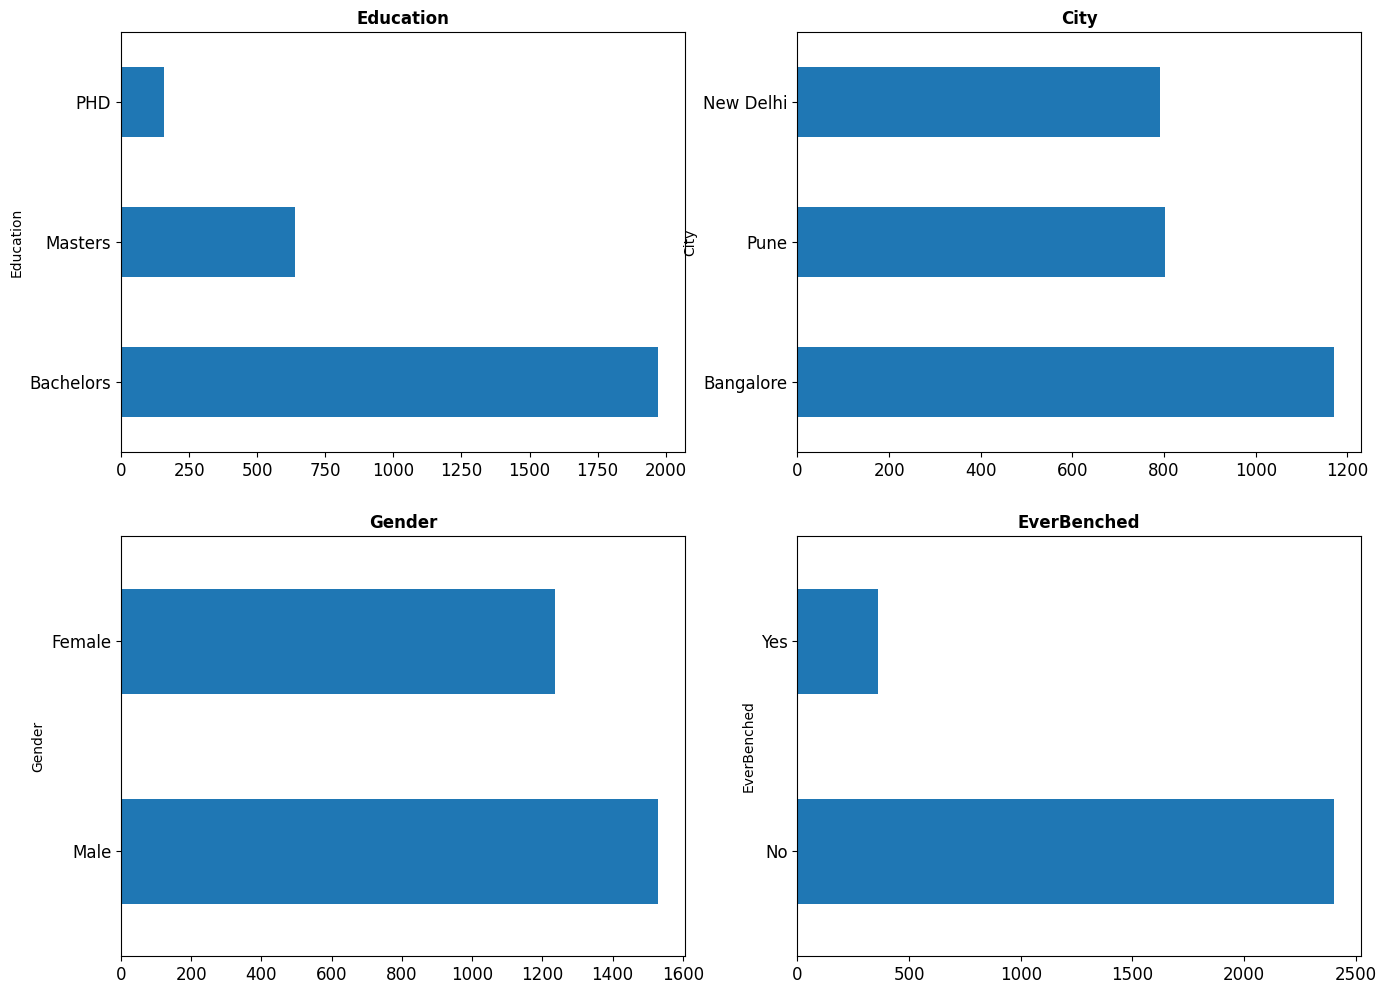

In [19]:
graficos_eda_categoricos(df.select_dtypes('O'))

In [9]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [20]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
JoiningYear,2764.0,2015.090449,2015.0,1.885943,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,2764.0,2.636035,3.0,0.624001,1.0,2.0,3.0,3.0,3.0
Age,2764.0,30.952967,30.0,5.108872,22.0,27.0,30.0,35.0,41.0
ExperienceInCurrentDomain,2764.0,2.644356,2.0,1.610610,0.0,1.0,2.0,4.0,7.0
LeaveOrNot,2764.0,0.393632,0.0,0.488643,0.0,0.0,0.0,1.0,1.0


In [21]:
df.groupby("Education")["Age"].mean()

Education
Bachelors    31.306443
Masters      30.149137
PHD          29.769231
Name: Age, dtype: float64

In [23]:
df.sort_values(by ="JoiningYear", ascending=True, inplace  =True)

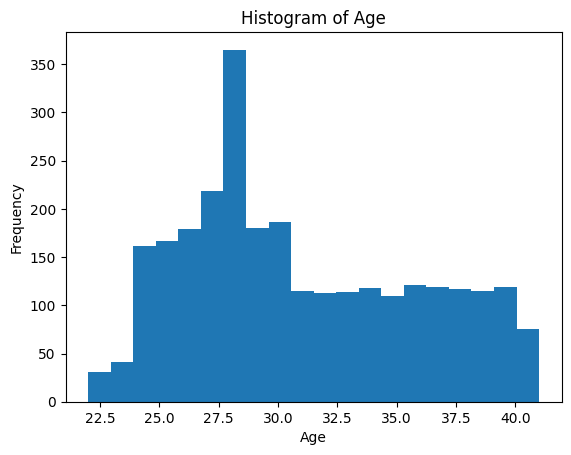

In [24]:
plt.hist(df["Age"], bins = 20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

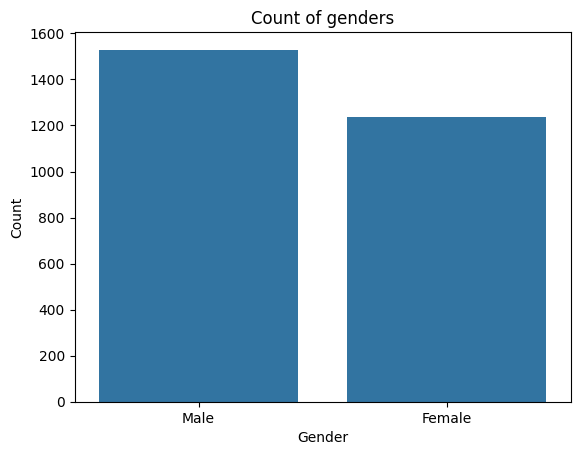

In [26]:
sns.countplot(data = df, x = "Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count of genders")
plt.show()

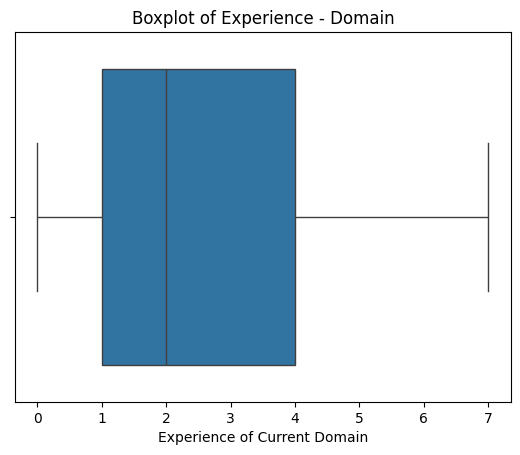

In [28]:
sns.boxplot(data = df, x = "ExperienceInCurrentDomain")
plt.xlabel("Experience of Current Domain")
plt.title("Boxplot of Experience - Domain")
plt.show()

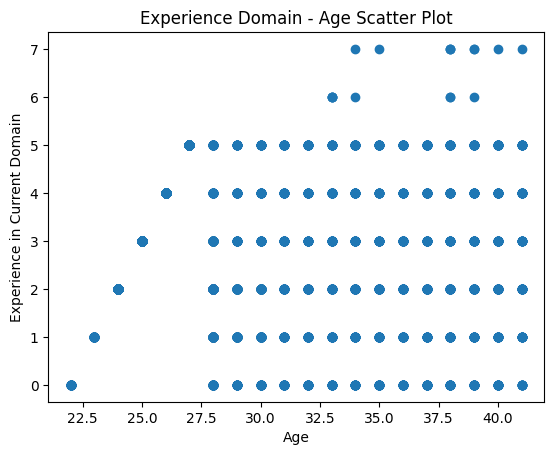

In [29]:
plt.scatter(df["Age"],df["ExperienceInCurrentDomain"])
plt.xlabel("Age")
plt.ylabel("Experience in Current Domain")
plt.title("Experience Domain - Age Scatter Plot")
plt.show()

In [40]:
df.groupby("PaymentTier")["LeaveOrNot"].value_counts()

PaymentTier  LeaveOrNot
1            0              154
             1               89
2            1              550
             0              368
3            0             2531
             1              961
Name: count, dtype: int64

In [42]:
df[df["LeaveOrNot"] == 1]["PaymentTier"].mean()

2.545

In [43]:
df.groupby("City")["City"].count()

City
Bangalore    2228
New Delhi    1157
Pune         1268
Name: City, dtype: int64

In [44]:
benched_percentage = df.groupby("EverBenched")["EverBenched"].count()/len(df)*100
benched_percentage

EverBenched
No     89.727058
Yes    10.272942
Name: EverBenched, dtype: float64

In [45]:
df.groupby(["Education", "Gender"])["Age"].mean()

Education  Gender
Bachelors  Female    29.396516
           Male      29.440443
Masters    Female    29.490566
           Male      29.143426
PHD        Female    29.420290
           Male      29.218182
Name: Age, dtype: float64

In [46]:
df.groupby("PaymentTier")["ExperienceInCurrentDomain"].std()

PaymentTier
1    1.644118
2    1.514013
3    1.563505
Name: ExperienceInCurrentDomain, dtype: float64

In [47]:
df.groupby(["JoiningYear", "Gender"])["Gender"].count()

JoiningYear  Gender
2012         Female    180
             Male      324
2013         Female    253
             Male      416
2014         Female    246
             Male      453
2015         Female    440
             Male      341
2016         Female    178
             Male      347
2017         Female    450
             Male      658
2018         Female    128
             Male      239
Name: Gender, dtype: int64

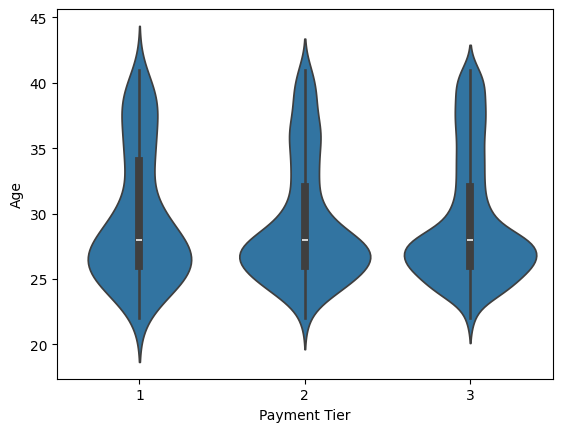

In [48]:
sns.violinplot(data = df, x = "PaymentTier", y = "Age")
plt.xlabel("Payment Tier")
plt.ylabel("Age")
plt.show()

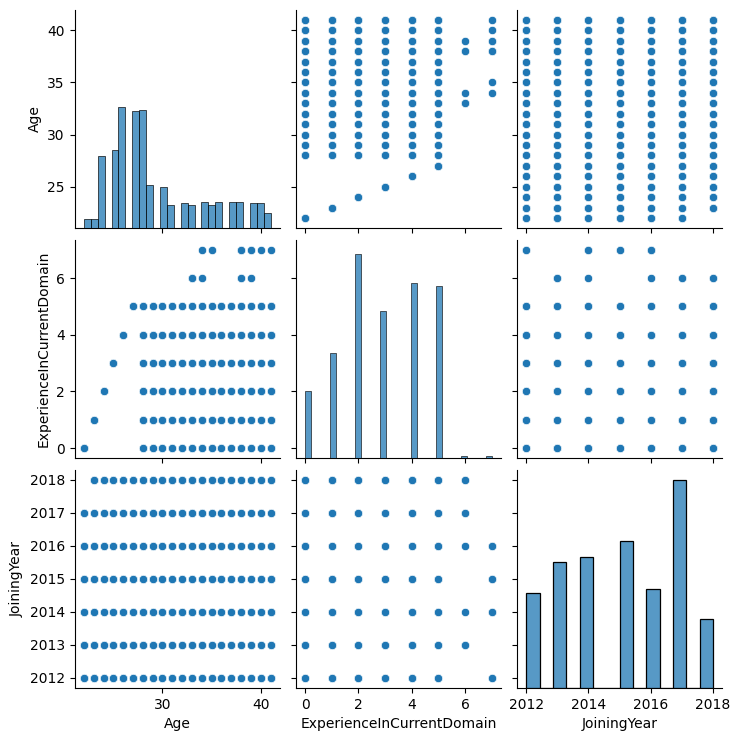

In [49]:
sns.pairplot(df[["Age","ExperienceInCurrentDomain", "JoiningYear"]])
plt.show()

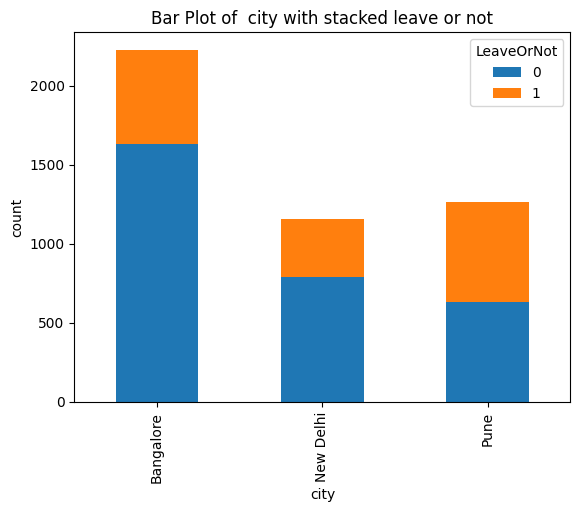

In [54]:
city_leave_count = df.groupby("City")["LeaveOrNot"].value_counts().unstack()
city_leave_count.plot(kind = "bar", stacked = True)
plt.xlabel("city")
plt.ylabel("count")
plt.title("Bar Plot of  city with stacked leave or not")
plt.legend(title = "LeaveOrNot")
plt.show()

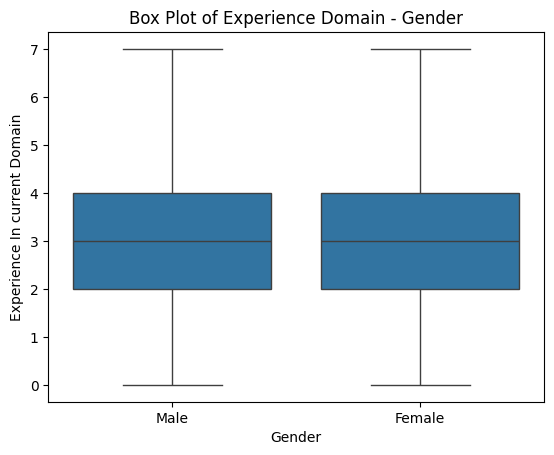

In [56]:
sns.boxplot(data = df, x = "Gender", y ="ExperienceInCurrentDomain")
plt.xlabel("Gender")
plt.ylabel("Experience In current Domain")
plt.title("Box Plot of Experience Domain - Gender")
plt.show()

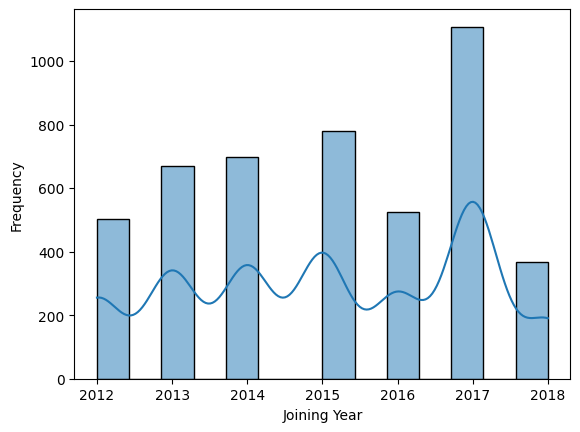

In [57]:
sns.histplot(df["JoiningYear"], kde=True)
plt.xlabel("Joining Year")
plt.ylabel("Frequency")
plt.show()

In [58]:
grouped = df.groupby(["Education", "Gender"])["ExperienceInCurrentDomain"].mean().unstack()

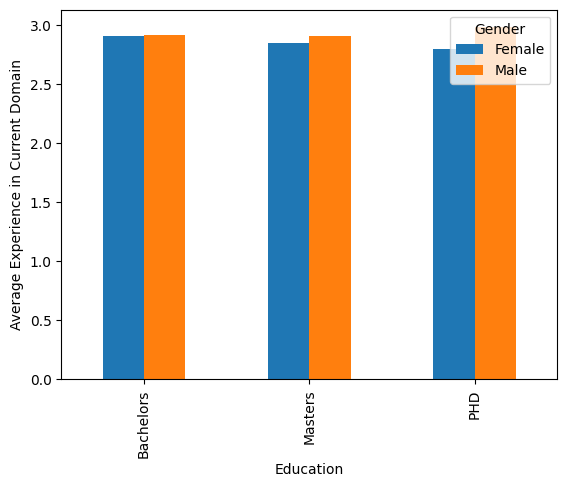

In [59]:
grouped.plot(kind="bar")
plt.xlabel("Education")
plt.ylabel("Average Experience in Current Domain")
plt.show()

In [62]:
grouped = df.groupby(["JoiningYear", "EverBenched"])["EverBenched"].count().unstack()

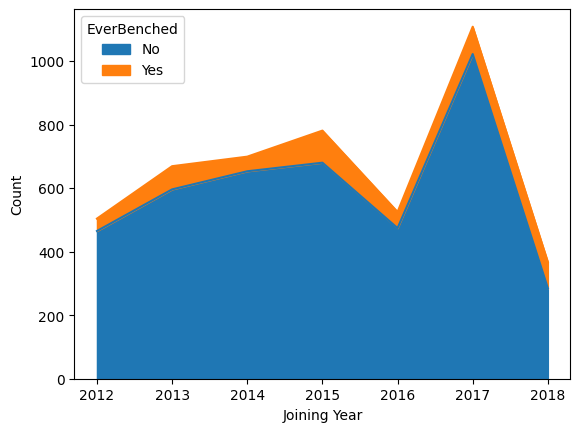

In [63]:
grouped.plot(kind="area", stacked = True)
plt.xlabel("Joining Year")
plt.ylabel("Count")
plt.legend(title = "EverBenched")
plt.show()

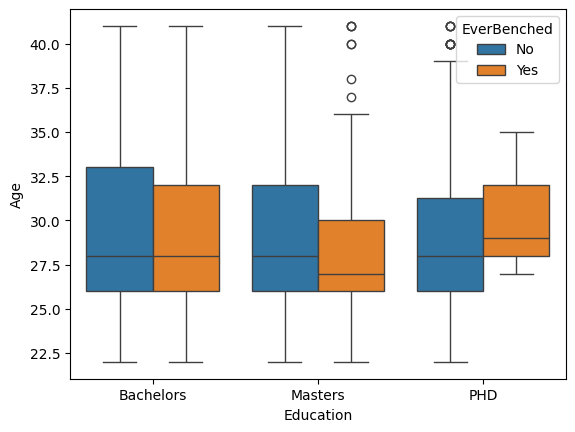

In [65]:
sns.boxplot(data = df, x = "Education", y = "Age", hue = "EverBenched")
plt.xlabel("Education")
plt.ylabel("Age")
plt.legend(title = "EverBenched")
plt.show()

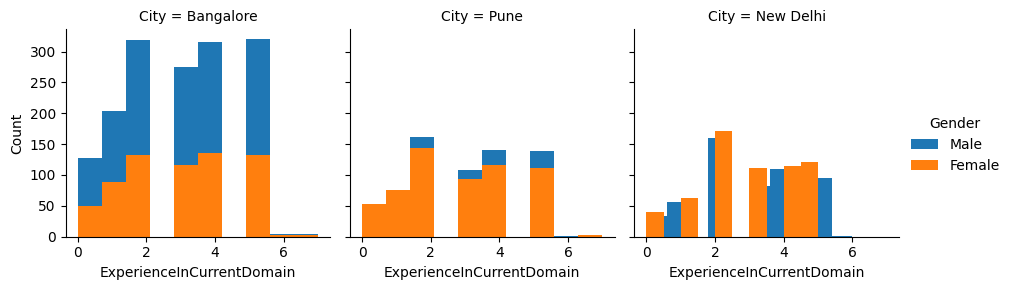

In [66]:
g = sns.FacetGrid(df, col = "City", hue = "Gender")
g.map(plt.hist, "ExperienceInCurrentDomain")
g.set_axis_labels("ExperienceInCurrentDomain", "Count")
g.add_legend(title = "Gender")
plt.show()

In [68]:
grouped = df.groupby(["JoiningYear", "City"])["Age"].mean().unstack()


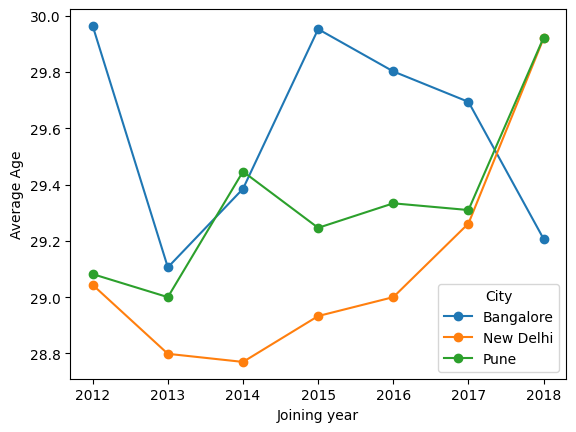

In [69]:
grouped.plot(kind = "line", marker = "o")
plt.xlabel("Joining year")
plt.ylabel("Average Age")
plt.show()

# Machine Learning

In [70]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [88]:
df.head()

,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,3,1,0,0,0
1,0,1,0,0,3,1
2,0,3,0,0,2,0
3,1,3,1,0,5,1
4,1,3,1,1,2,1


In [86]:
df.drop(columns=["JoiningYear", "City", "Age"], inplace = True)

In [87]:
df["Education"] = labelencoder.fit_transform(df["Education"])
df["Gender"] = labelencoder.fit_transform(df["Gender"])
df["EverBenched"] = labelencoder.fit_transform(df["EverBenched"])

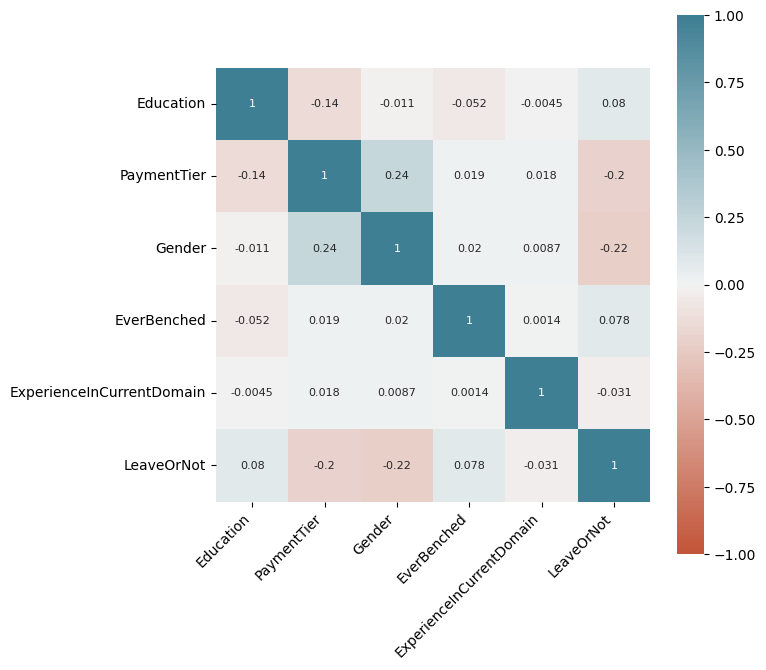

In [89]:
corr_matrix = df.corr(method='pearson')
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [90]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Como tenemos como target una variable categorica (se va o no), utilizaremos métodos de clasficiación

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [104]:
from sklearn.metrics import accuracy_score

def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test,predictions)))

In [105]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)
log_predictions = log_model.predict(scaled_X_test)
modelperformance(log_predictions)

Accuracy score on model is 0.6928034371643395


In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn = KNeighborsClassifier()

param_grid = {"n_neighbors":  [3,5,7,9,11],
              "weights":["uniform", "distance"],
              "algorithm": ["auto", "ball_tree","kd_tree", "brute"]}

cv_classifier = GridSearchCV(knn, param_grid,cv=3)
cv_classifier.fit(scaled_X_train,y_train)
print(cv_classifier.best_params_)

{'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'uniform'}


In [106]:
pred_grid_knn = cv_classifier.predict(scaled_X_test)
modelperformance(pred_grid_knn)

Accuracy score on model is 0.7078410311493019


In [108]:
from sklearn.svm import SVC
svm = SVC()
param_grid_svr ={"C":[0.01,0.1,0.5,1], 
                 "kernel": ["linear", "rbf", "poly"]}

gridsvr =GridSearchCV(svm,param_grid_svr, cv = 3)
gridsvr.fit(scaled_X_train, y_train)
print(gridsvr.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [109]:
pred_svc = gridsvr.predict(scaled_X_test)
modelperformance(pred_svc)

Accuracy score on model is 0.719656283566058


In [113]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param_grid ={"criterion":["gini", "entropy"],
            "splitter":["best", "random"],
            "max_depth": [None, 10, 20, 30, 40, 50],
            "min_samples_split": [2,5,10],
            "min_samples_leaf": [1,2,4]}
grid_search_tree = GridSearchCV(dtc, param_grid, cv = 3)
grid_search_tree.fit(scaled_X_train, y_train)
print(grid_search_tree.best_params_)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [114]:
pred_dtc = grid_search_tree.predict(scaled_X_test)
modelperformance(pred_dtc)

Accuracy score on model is 0.7250268528464017


In [116]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
n_estimators = [32,64,128, 256]
max_features = [2,3,4]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfc = {
    "n_estimators":n_estimators,
    "max_features": max_features,
    "bootstrap":bootstrap,
    "oob_score":oob_score
}

grid_rfc = GridSearchCV(rfc_model, param_grid_rfc, cv=3)
grid_rfc.fit(scaled_X_train, y_train)
print(grid_rfc.best_params_)


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
36 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packag

{'bootstrap': True, 'max_features': 3, 'n_estimators': 128, 'oob_score': True}


In [117]:
predsrfc=grid_rfc.predict(scaled_X_test)
modelperformance(predsrfc)

Accuracy score on model is 0.7218045112781954


### Predicción

In [118]:
x.mean()

Education                    0.264560
PaymentTier                  2.698259
Gender                       0.597034
EverBenched                  0.102729
ExperienceInCurrentDomain    2.905652
dtype: float64

In [120]:
EmployeeData = np.array([0,3,1,0,3])

In [122]:
def leaveOrNot(employee):
    predictions = grid_search_tree.predict(employee.reshape(1,-1))
    if predictions == 1:
        return "will leave"
    else:
        return "won't leave"

In [124]:
print("This employee {} according to the Decission Tree Classifier Model".format(leaveOrNot(EmployeeData)))

This employee will leave according to the Decission Tree Classifier Model
